## Importing Libraries

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt, exp

## Gaussian Lowpass Frequency Domain Filtering

In [2]:
# function to calculate distance between center and reference point
def distance(p1, p2):
  return sqrt((p1[0]-p2[0])**2 + (p1[1]-p2[1])**2)

# gaussian lowpass filter
def GaussianLP(image, D0):

  # allocating memory for the filter
  filter = np.zeros(image.shape[:2])
  rows, cols = image.shape[:2]

  # defining the center of the filter
  center = (rows/2, cols/2)

  for x in range(cols):
    for y in range(rows):
      filter[y,x] = exp(((-distance((y,x),center)**2)/(2*(D0**2))))

  return filter

<ipython-input-6-9f61699a53ab>:7: RuntimeWarning: divide by zero encountered in log
  plt.subplot(161), plt.imshow(np.log(1 + np.abs(testPattern)), "gray"), plt.title("Original Image")


(<Axes: title={'center': 'Inverse Fourier Transform'}>,
 Text(0.5, 1.0, 'Inverse Fourier Transform'))

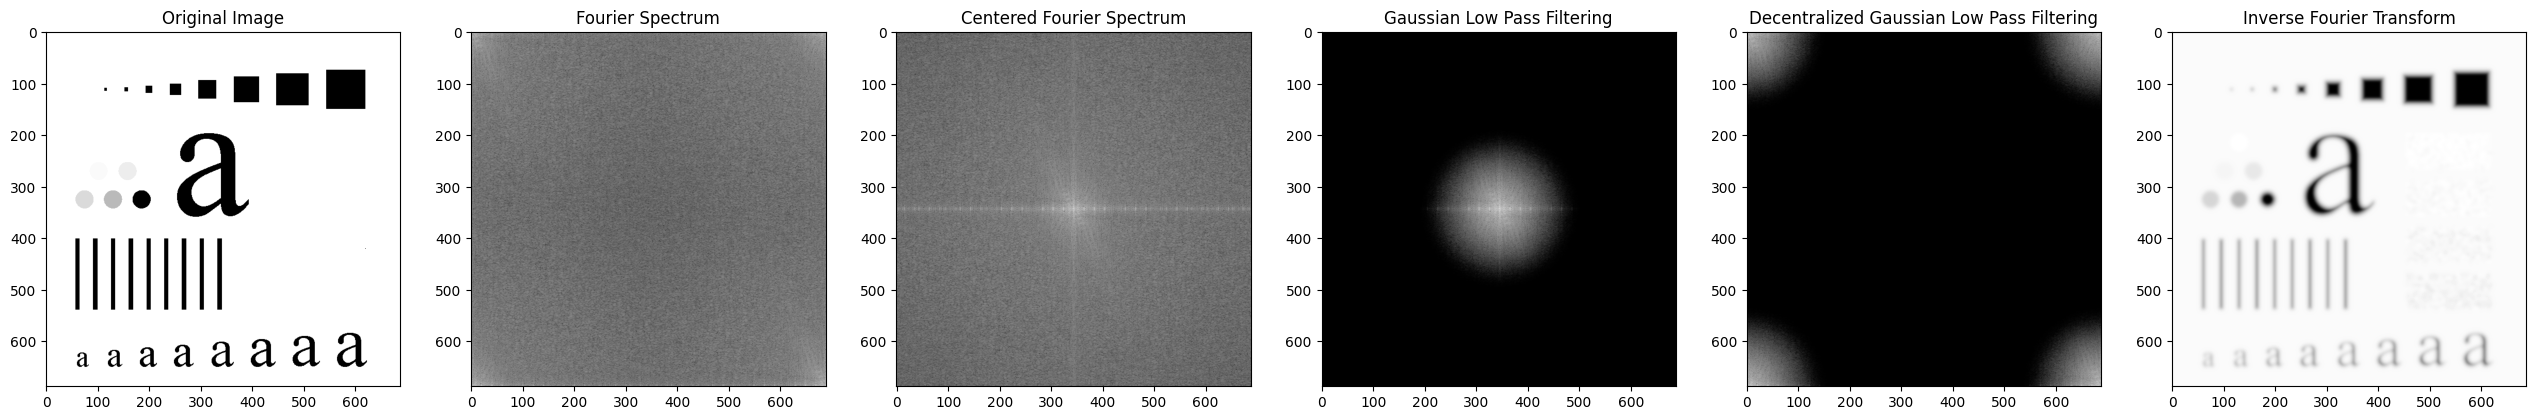

In [6]:
# preparing grid for displaying results
plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

# loading the image
testPattern = cv2.imread('test_pattern.tif')
testPattern = cv2.cvtColor(testPattern, cv2.COLOR_BGR2GRAY)
plt.subplot(161), plt.imshow(np.log(1 + np.abs(testPattern)), "gray"), plt.title("Original Image")

# fourier transform of the original image
testPattern_fourier = np.fft.fft2(testPattern)
plt.subplot(162), plt.imshow(np.log(1 + np.abs(testPattern_fourier)), "gray"), plt.title("Fourier Spectrum")

# centered fourier spectrum
testPattern_fourier_centered = np.fft.fftshift(testPattern_fourier)
plt.subplot(163), plt.imshow(np.log(1 + np.abs(testPattern_fourier_centered)), "gray"), plt.title("Centered Fourier Spectrum")

# gaussian LP filtering (change the D0 parameter to observe changes in the result with different radii)
testPattern_gaussianLP = testPattern_fourier_centered * GaussianLP(testPattern, 30)
plt.subplot(164), plt.imshow(np.log(1 + np.abs(testPattern_gaussianLP)), "gray"), plt.title("Gaussian Low Pass Filtering")

# decentralized LP
testPattern_gaussianLP_decentralized = np.fft.ifftshift(testPattern_gaussianLP)
plt.subplot(165), plt.imshow(np.log(1 + np.abs(testPattern_gaussianLP_decentralized)), "gray"), plt.title("Decentralized Gaussian Low Pass Filtering")

# Inverse Fourier Transform
testPattern_inverseFourier = np.fft.ifft2(testPattern_gaussianLP_decentralized)
plt.subplot(166), plt.imshow(np.log(1 + np.abs(testPattern_inverseFourier)), "gray"), plt.title("Inverse Fourier Transform")

## Gaussian High Pass Frequency Domain Filtering

In [5]:
# function to calculate distance between center and reference point
def distance(p1, p2):
  return sqrt((p1[0]-p2[0])**2 + (p1[1]-p2[1])**2)

# gaussian lowpass filter
def GaussianHP(image, D0):

  # allocating memory for the filter
  filter = np.zeros(image.shape[:2])
  rows, cols = image.shape[:2]

  # defining the center of the filter
  center = (rows/2, cols/2)

  for x in range(cols):
    for y in range(rows):
      filter[y,x] = 1 - exp(((-distance((y,x),center)**2)/(2*(D0**2))))

  return filter

<ipython-input-10-ad60670d820e>:7: RuntimeWarning: divide by zero encountered in log
  plt.subplot(161), plt.imshow(np.log(1 + np.abs(testPattern)), "gray"), plt.title("Original Image")


(<Axes: title={'center': 'Inverse Fourier Transform'}>,
 Text(0.5, 1.0, 'Inverse Fourier Transform'))

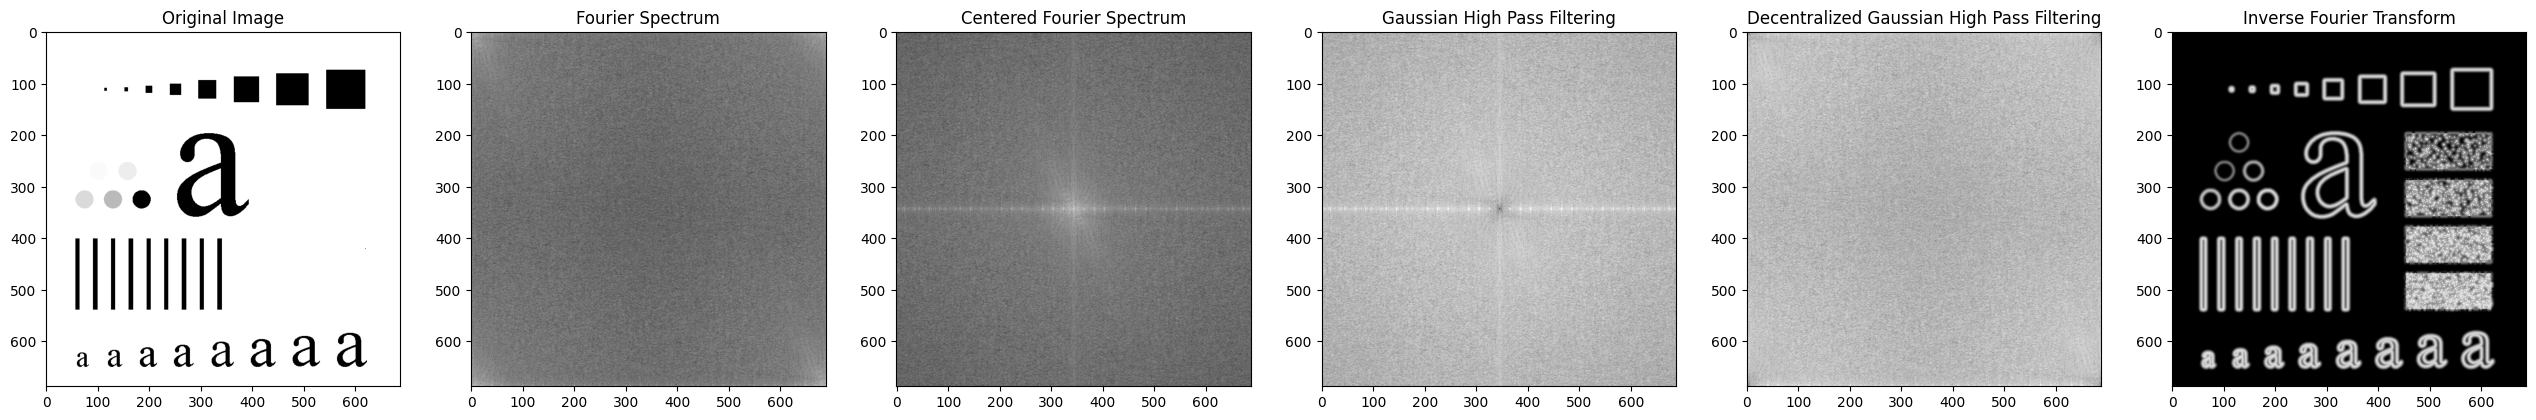

In [10]:
# preparing grid for displaying results
plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

# loading the image
testPattern = cv2.imread('test_pattern.tif')
testPattern = cv2.cvtColor(testPattern, cv2.COLOR_BGR2GRAY)
plt.subplot(161), plt.imshow(np.log(1 + np.abs(testPattern)), "gray"), plt.title("Original Image")

# fourier transform of the original image
testPattern_fourier = np.fft.fft2(testPattern)
plt.subplot(162), plt.imshow(np.log(1 + np.abs(testPattern_fourier)), "gray"), plt.title("Fourier Spectrum")

# centered fourier spectrum
testPattern_fourier_centered = np.fft.fftshift(testPattern_fourier)
plt.subplot(163), plt.imshow(np.log(1 + np.abs(testPattern_fourier_centered)), "gray"), plt.title("Centered Fourier Spectrum")

# gaussian HP filtering (change the D0 parameter to observe changes in the result with different radii)
testPattern_gaussianHP = testPattern_fourier_centered * GaussianHP(testPattern, 50)
plt.subplot(164), plt.imshow(np.log(1 + np.abs(testPattern_gaussianHP)), "gray"), plt.title("Gaussian High Pass Filtering")

# decentralized HP
testPattern_gaussianHP_decentralized = np.fft.ifftshift(testPattern_gaussianHP)
plt.subplot(165), plt.imshow(np.log(1 + np.abs(testPattern_gaussianHP_decentralized)), "gray"), plt.title("Decentralized Gaussian High Pass Filtering")

# Inverse Fourier Transform
testPattern_inverseFourier = np.fft.ifft2(testPattern_gaussianHP_decentralized)
plt.subplot(166), plt.imshow(np.log(1 + np.abs(testPattern_inverseFourier)), "gray"), plt.title("Inverse Fourier Transform")